***Business Case: Delhivery - Feature Engineering***

# Problem Statement and Exploratory Data Analysis

The main objective is to help Delhivery process, clean, and analyze data generated from their logistics operations. The goal is to make sense of this raw data, engineer useful features, and assist the data science team in building forecasting models for improved efficiency, quality, and profitability of deliveries. Specifically, we will clean, sanitize, and manipulate the data and build useful features to merge various trip segments. These features will be critical for understanding the time, distance, and other operational metrics involved in each delivery.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
delhivery_data = pd.read_csv("/content/delhivery.csv")

In [4]:
# Display the shape of the data
print("Shape of the dataset:", delhivery_data.shape)


Shape of the dataset: (144867, 24)


In [5]:
# Display the data types of all attributes
print("Data types of the attributes:\n", delhivery_data.dtypes)


Data types of the attributes:
 data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
seg

In [6]:
# Convert object type columns that represent categories to 'category' data type
categorical_columns = ['data', 'route_type', 'trip_uuid', 'source_center', 'destination_center']

for col in categorical_columns:
    delhivery_data[col] = delhivery_data[col].astype('category')

print("Updated Data Types:\n", delhivery_data.dtypes)


Updated Data Types:
 data                              category
trip_creation_time                  object
route_schedule_uuid                 object
route_type                        category
trip_uuid                         category
source_center                     category
source_name                         object
destination_center                category
destination_name                    object
od_start_time                       object
od_end_time                         object
start_scan_to_end_scan             float64
is_cutoff                             bool
cutoff_factor                        int64
cutoff_timestamp                    object
actual_distance_to_destination     float64
actual_time                        float64
osrm_time                          float64
osrm_distance                      float64
factor                             float64
segment_actual_time                float64
segment_osrm_time                  float64
segment_osrm_distance            

In [7]:
# Check for missing values in the dataset
missing_values = delhivery_data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [8]:
# Display statistical summary of the dataset
print("Statistical Summary of the dataset:\n", delhivery_data.describe())


Statistical Summary of the dataset:
        start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085

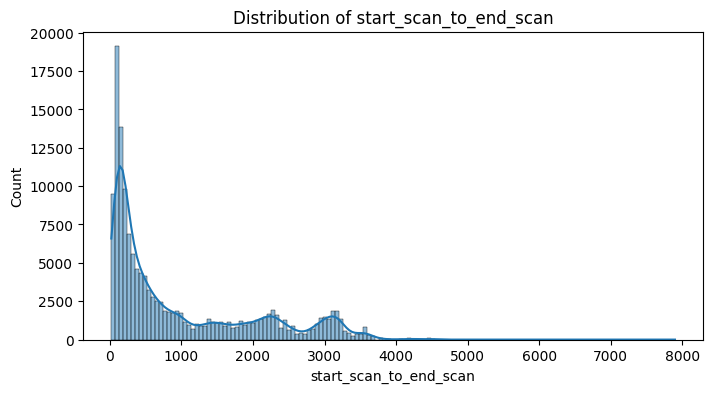

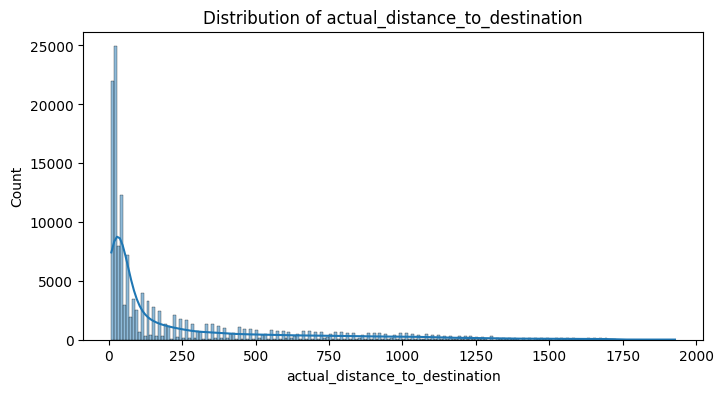

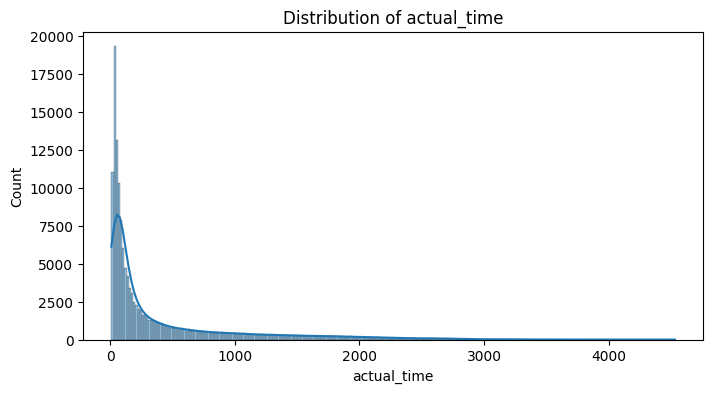

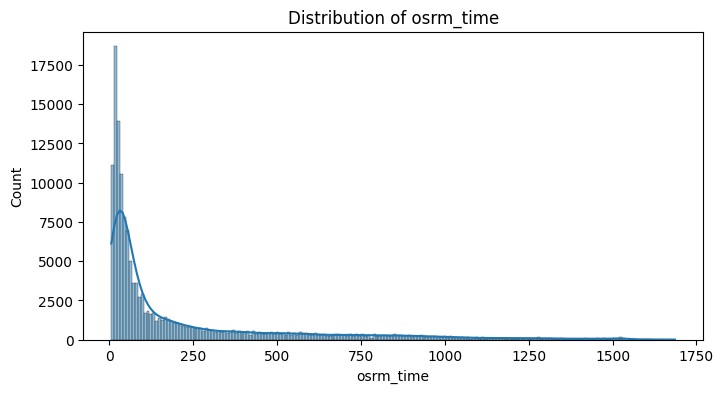

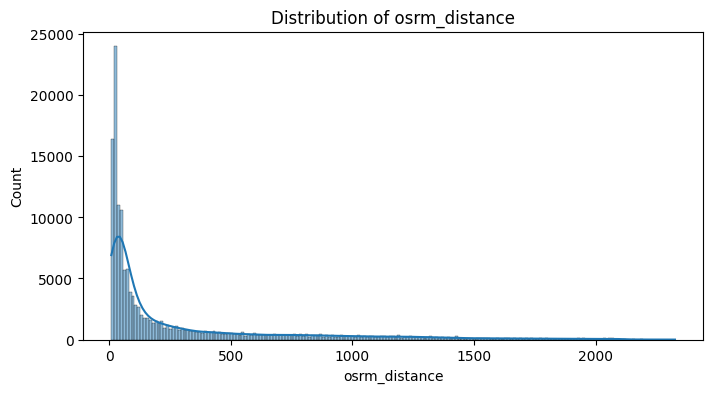

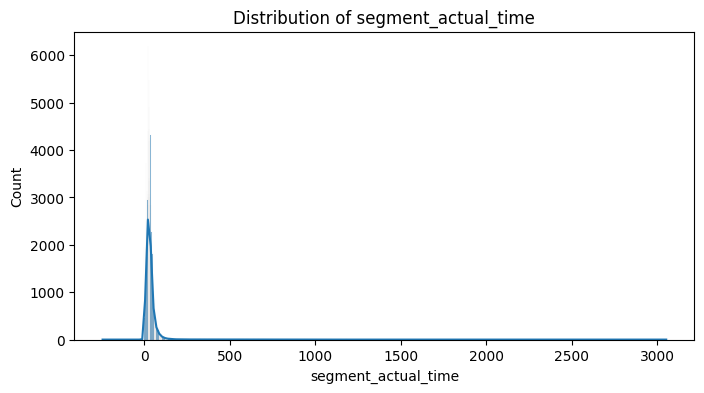

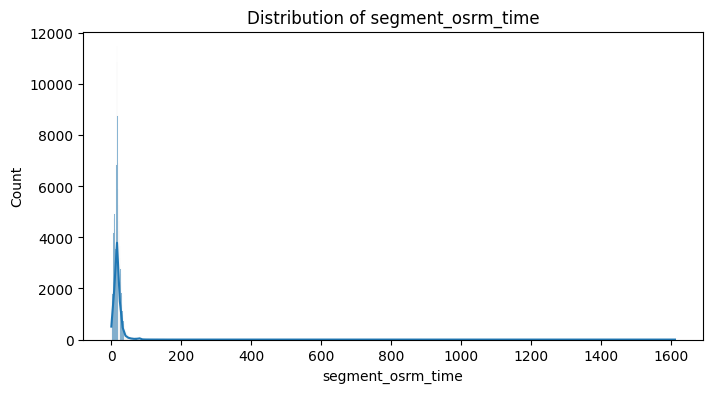

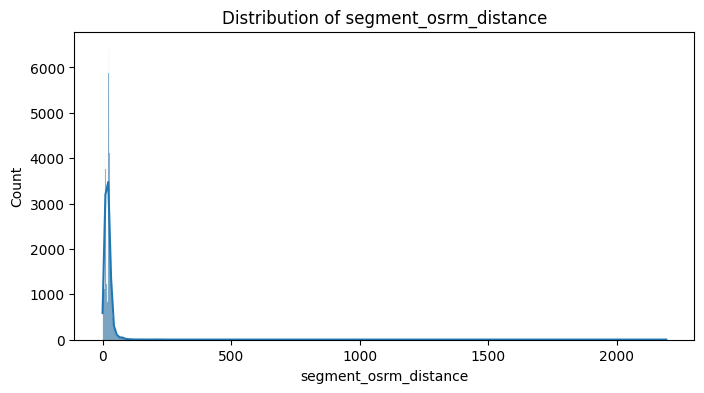

In [9]:
# Plot distribution of continuous variables
continuous_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                      'actual_time', 'osrm_time', 'osrm_distance',
                      'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(delhivery_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


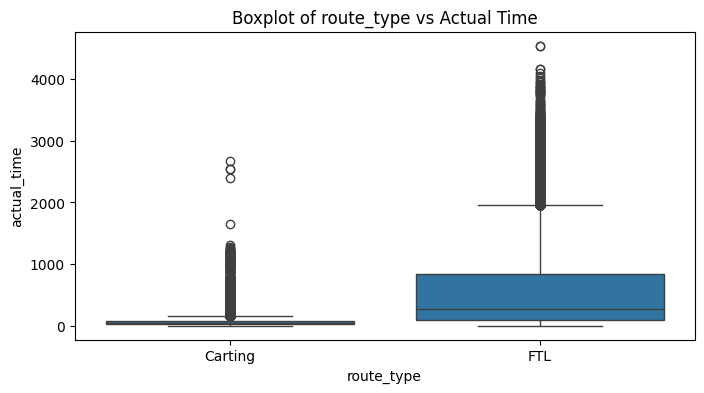

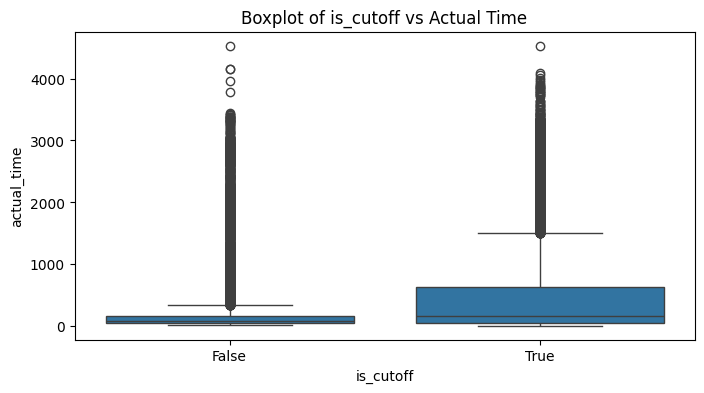

In [10]:
# Plot boxplots for categorical variables against a continuous variable (example with 'actual_time')
categorical_columns_for_boxplot = ['route_type', 'is_cutoff']

for col in categorical_columns_for_boxplot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='actual_time', data=delhivery_data)
    plt.title(f'Boxplot of {col} vs Actual Time')
    plt.show()


***Observations and Insights based on EDA***

**Range of Attributes and Outliers**

start_scan_to_end_scan, actual_time, osrm_time, and osrm_distance exhibit significant variation across deliveries.

Some deliveries show start_scan_to_end_scan times as long as 7898 units, with a majority clustering below 2000 units.

actual_time ranges from 9 to 4532 units, which also reveals substantial variation.

There are clear outliers in almost all continuous variables, especially in the upper ranges (e.g., in actual_time, osrm_time, and osrm_distance).

segment_actual_time, segment_osrm_time, and segment_osrm_distance reflect smaller delivery segments, where the majority of values are clustered toward the lower end, with rare but extreme outliers.

**Distribution of Variables**

Most continuous variables are right-skewed, meaning there is a higher concentration of shorter trips or deliveries (in terms of time or distance), with a small number of long trips or deliveries.
This skewness indicates that the majority of deliveries occur over short distances and short durations, with a few longer deliveries that take significantly more time or cover more distance.

**Boxplots and Relationship Insights**

*Route Type vs Actual Time:*

The FTL (Full Truck Load) deliveries take longer on average compared to Carting deliveries, with more variability and more significant outliers.
Carting shows a tightly clustered distribution with fewer extreme outliers, indicating more consistency in delivery times.

*Is Cutoff vs Actual Time:*

Trips marked as cutoff show more considerable variability in actual_time, with more extreme outliers. This suggests that cutoff trips may be experiencing delays or other operational challenges that affect delivery time.

**Univariate Analysis:**

Continuous variables, such as start_scan_to_end_scan, actual_distance_to_destination, and actual_time, show heavy right-skewed distributions. This implies that most deliveries are short, with few long-duration or long-distance deliveries.
Segment-related variables (e.g., segment_actual_time) exhibit a similar pattern but with smaller ranges, which is expected since they represent shorter delivery segments.

**Bivariate Analysis:**

Route Type vs Actual Time shows clear differences in delivery time depending on the transportation type, with FTL deliveries taking more time on average.

Is Cutoff vs Actual Time suggests cutoff deliveries experience delays or variability in actual delivery time, indicating that special handling or exceptions may be required for such deliveries.

**Outlier Treatment Recommendation**

Due to the presence of extreme outliers, especially in the actual_time, osrm_time, and osrm_distance variables, it would be advisable to treat these outliers using the IQR method. This would help mitigate the influence of extreme values on model building and analysis, ensuring that the majority distribution is better represented in any forecasting models.

# Feature Creation

**1. Handle Missing Values**

We'll handle the missing values in source_name and destination_name. For simplicity, we'll fill the missing values with "Unknown."

In [11]:
# Fill missing values in source_name and destination_name
delhivery_data['source_name'].fillna('Unknown', inplace=True)
delhivery_data['destination_name'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
print(delhivery_data.isnull().sum())


data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


**2. Convert Categorical Variables**

We will convert object columns that represent categories to the 'category' data type for better performance.

In [12]:
# Convert categorical columns to 'category' type
categorical_columns = ['data', 'route_type', 'trip_uuid', 'source_center', 'destination_center']

for col in categorical_columns:
    delhivery_data[col] = delhivery_data[col].astype('category')

print("Updated Data Types:\n", delhivery_data.dtypes)


Updated Data Types:
 data                              category
trip_creation_time                  object
route_schedule_uuid                 object
route_type                        category
trip_uuid                         category
source_center                     category
source_name                         object
destination_center                category
destination_name                    object
od_start_time                       object
od_end_time                         object
start_scan_to_end_scan             float64
is_cutoff                             bool
cutoff_factor                        int64
cutoff_timestamp                    object
actual_distance_to_destination     float64
actual_time                        float64
osrm_time                          float64
osrm_distance                      float64
factor                             float64
segment_actual_time                float64
segment_osrm_time                  float64
segment_osrm_distance            

**3. Feature Creation**

3.1 Time Features from trip_creation_time

We will extract temporal features such as year, month, day, etc., from the trip_creation_time column.

In [13]:
# Convert 'trip_creation_time' to datetime type and extract features
delhivery_data['trip_creation_time'] = pd.to_datetime(delhivery_data['trip_creation_time'])

delhivery_data['year'] = delhivery_data['trip_creation_time'].dt.year
delhivery_data['month'] = delhivery_data['trip_creation_time'].dt.month
delhivery_data['day'] = delhivery_data['trip_creation_time'].dt.day
delhivery_data['day_of_week'] = delhivery_data['trip_creation_time'].dt.dayofweek
delhivery_data['hour'] = delhivery_data['trip_creation_time'].dt.hour
delhivery_data['minute'] = delhivery_data['trip_creation_time'].dt.minute


3.2 Create Total Trip Time from od_start_time and od_end_time



In [14]:
# Convert 'od_start_time' and 'od_end_time' to datetime type and create total_trip_time
delhivery_data['od_start_time'] = pd.to_datetime(delhivery_data['od_start_time'])
delhivery_data['od_end_time'] = pd.to_datetime(delhivery_data['od_end_time'])

# Create a new feature for total trip time (in minutes)
delhivery_data['total_trip_time'] = (delhivery_data['od_end_time'] - delhivery_data['od_start_time']).dt.total_seconds() / 60


3.3 Extract Features from source_name and destination_name

In [15]:
# Split source and destination names to extract city and state
delhivery_data['source_city'] = delhivery_data['source_name'].str.split('_').str[0]
delhivery_data['source_state'] = delhivery_data['source_name'].str.extract(r'\((.*?)\)')

delhivery_data['destination_city'] = delhivery_data['destination_name'].str.split('_').str[0]
delhivery_data['destination_state'] = delhivery_data['destination_name'].str.extract(r'\((.*?)\)')


3.4 Aggregated Features for Trips

In [16]:
trip_features = delhivery_data.groupby('trip_uuid').agg({
    'actual_time': ['sum', 'mean', 'max'],
    'osrm_time': ['sum', 'mean', 'max'],
    'osrm_distance': ['sum', 'mean', 'max'],
    'segment_actual_time': ['sum', 'mean', 'max'],
    'segment_osrm_time': ['sum', 'mean', 'max'],
    'segment_osrm_distance': ['sum', 'mean', 'max']
})

# Flatten the multi-level index but keep the 'trip_uuid' intact
trip_features.columns = ['_'.join(col).strip() for col in trip_features.columns.values]
trip_features = trip_features.reset_index()  # Reset index to bring back 'trip_uuid'


<ipython-input-16-ade8d2aba560>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_features = delhivery_data.groupby('trip_uuid').agg({


3.5 Create Ratio Features

We can create ratio features between actual and predicted values.

In [17]:
# Create ratio features
delhivery_data['actual_osrm_time_ratio'] = delhivery_data['actual_time'] / delhivery_data['osrm_time']
delhivery_data['segment_time_ratio'] = delhivery_data['segment_actual_time'] / delhivery_data['segment_osrm_time']


3.6 Boolean Feature for Cutoff

We’ll convert the is_cutoff column to a binary feature.

In [18]:
# Binary feature for cutoff
delhivery_data['cutoff'] = delhivery_data['is_cutoff'].astype(int)


**4. Outlier Detection and Treatment**

We will use the Interquartile Range (IQR) method to detect and handle outliers.

In [19]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier treatment on key columns
columns_to_treat = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'start_scan_to_end_scan']
for col in columns_to_treat:
    delhivery_data = remove_outliers(delhivery_data, col)


**5. One-Hot Encoding for Categorical Variables**

We will one-hot encode the necessary categorical columns such as route_type, source_state, and destination_state.

In [20]:
# One-hot encode categorical variables
delhivery_data = pd.get_dummies(delhivery_data, columns=['route_type', 'source_state', 'destination_state'], drop_first=True)


**6. Standardization of Numerical Features**

We will standardize or normalize the continuous features (like distances and times) using MinMaxScaler or StandardScaler from sklearn.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using MinMaxScaler for scaling
scaler = MinMaxScaler()

# List of continuous columns to scale
continuous_columns = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'start_scan_to_end_scan']

# Apply scaling
delhivery_data[continuous_columns] = scaler.fit_transform(delhivery_data[continuous_columns])

print(delhivery_data[continuous_columns].head())


   actual_time  osrm_time  actual_distance_to_destination  \
0     0.004456   0.015974                        0.006169   
1     0.013369   0.044728                        0.042700   
2     0.027629   0.070288                        0.080088   
3     0.047237   0.108626                        0.116531   
4     0.052585   0.121406                        0.130574   

   start_scan_to_end_scan  
0                0.057946  
1                0.057946  
2                0.057946  
3                0.057946  
4                0.057946  


**7. Final Dataset Check**

Finally, we can check the dataset after all preprocessing steps.

In [22]:
# Check the final dataset
print(delhivery_data.head())
print(delhivery_data.info())


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB

# Merging of rows and aggregation of fields

In [23]:
# 1. Group by 'trip_uuid' to aggregate time and distance features for each trip
trip_features = delhivery_data.groupby('trip_uuid').agg({
    'actual_time': ['sum', 'mean', 'max'],
    'osrm_time': ['sum', 'mean', 'max'],
    'osrm_distance': ['sum', 'mean', 'max'],
    'segment_actual_time': ['sum', 'mean', 'max'],
    'segment_osrm_time': ['sum', 'mean', 'max'],
    'segment_osrm_distance': ['sum', 'mean', 'max']
}).reset_index()

# 2. Flatten the multi-level column names
trip_features.columns = ['_'.join(col).strip() if col[1] else col[0] for col in trip_features.columns.values]

# Fix the renaming of 'trip_uuid_'
trip_features.rename(columns={'trip_uuid_': 'trip_uuid'}, inplace=True)

# Check the structure of aggregated features
print("Aggregated Trip Features:")
print(trip_features.head())

# 3. Merge the aggregated features back into the original dataset
delhivery_data = pd.merge(delhivery_data, trip_features, on='trip_uuid', how='left')

# 4. Calculate additional derived features (e.g., time difference between actual and osrm time)
delhivery_data['time_diff'] = delhivery_data['actual_time_sum'] - delhivery_data['osrm_time_sum']

# 5. Optionally, drop columns related to individual segments if no longer needed
columns_to_drop = [
    'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance'
]
delhivery_data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Check the final structure of the dataset
print("Final Dataset after Aggregation and Merging:")
print(delhivery_data.head())

# 6. Additional check: Display dataset info to ensure everything is in place
print(delhivery_data.info())

# 7. Save the processed dataset to a new CSV file (optional)
delhivery_data.to_csv("processed_delhivery_data.csv", index=False)


Aggregated Trip Features:
                 trip_uuid  actual_time_sum  actual_time_mean  \
0  trip-153671041653548748         1.789661          0.178966   
1  trip-153671042288605164         0.283422          0.031491   
2  trip-153671043369099517         1.930481          0.175498   
3  trip-153671046011330457         0.057041          0.028520   
4  trip-153671052974046625         0.439394          0.062771   

   actual_time_max  osrm_time_sum  osrm_time_mean  osrm_time_max  \
0         0.312834       2.840256        0.284026       0.536741   
1         0.077540       0.498403        0.055378       0.115016   
2         0.536542       3.715655        0.337787       0.658147   
3         0.044563       0.038339        0.019169       0.028754   
4         0.122995       0.527157        0.075308       0.127796   

   osrm_distance_sum  osrm_distance_mean  osrm_distance_max  \
0          1344.6487          134.464870           243.0267   
1           269.4308           29.936756        

<ipython-input-23-0cb16b16e65b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_features = delhivery_data.groupby('trip_uuid').agg({


Final Dataset after Aggregation and Merging:
       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  

# Comparison & Visualization of time and distance fields

1. Visualizing the Distribution of Time and Distance Fields

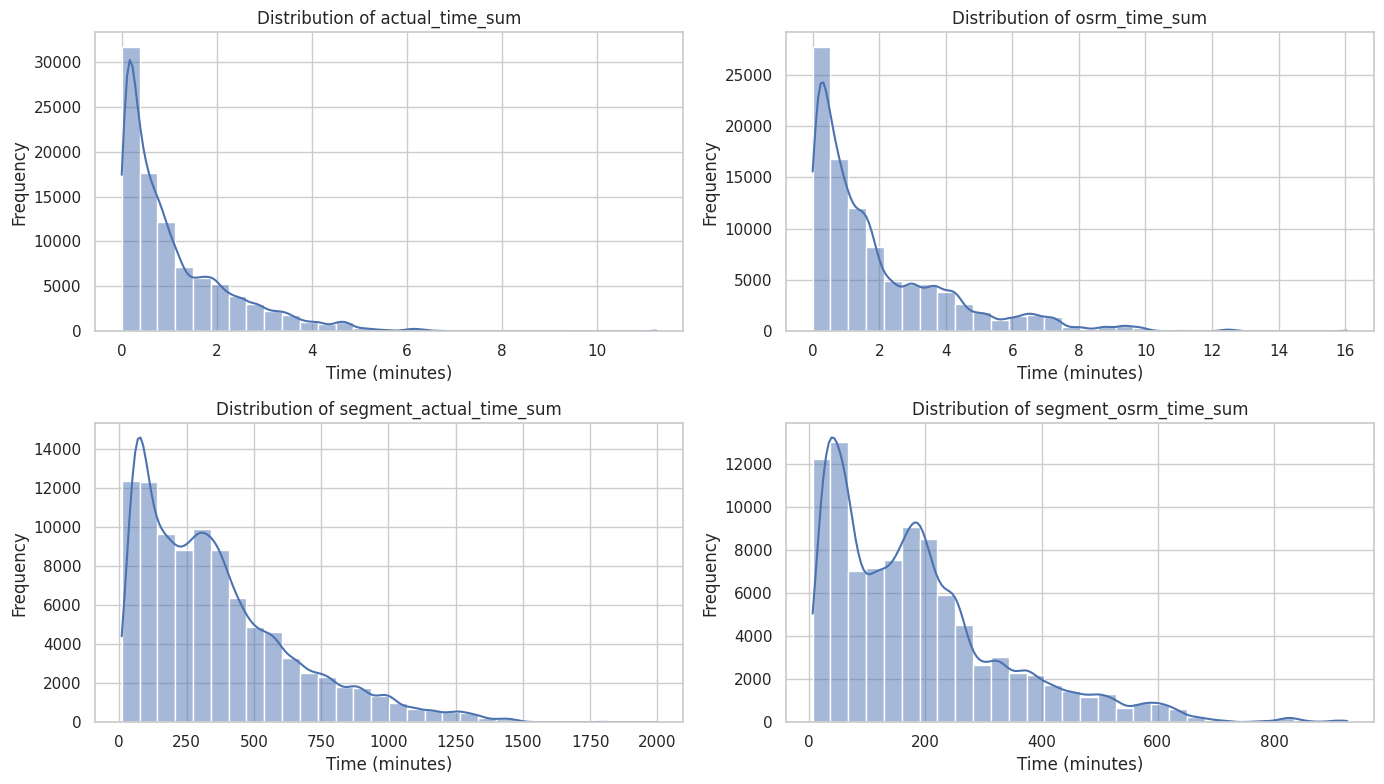

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# 1. Visualize the distribution of time fields
time_columns = ['actual_time_sum', 'osrm_time_sum', 'segment_actual_time_sum', 'segment_osrm_time_sum']
plt.figure(figsize=(14, 8))

for i, col in enumerate(time_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(delhivery_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2.  Visualize the Distribution of Distance Fields

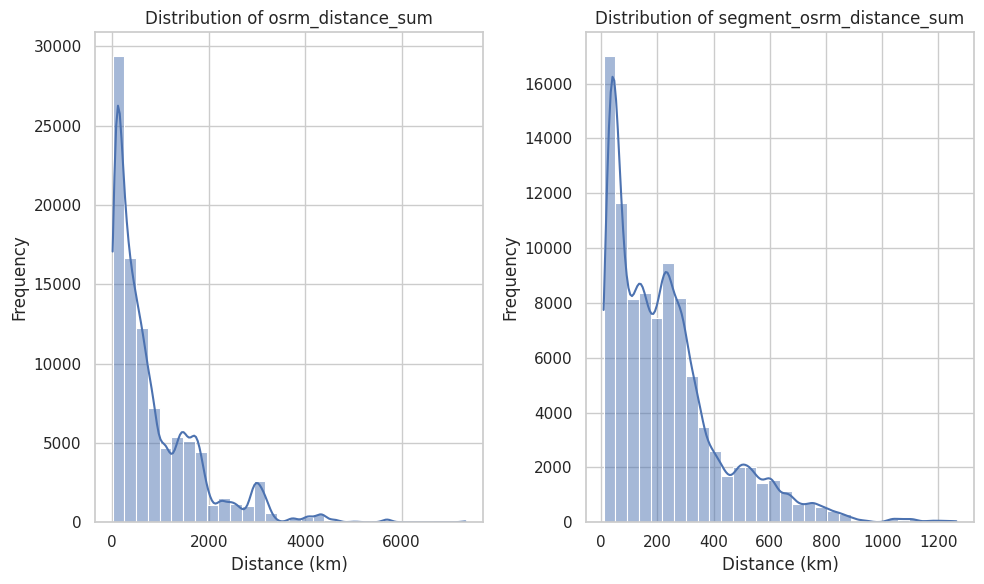

In [25]:
# 2. Visualize the distribution of distance fields
distance_columns = ['osrm_distance_sum', 'segment_osrm_distance_sum']
plt.figure(figsize=(10, 6))

for i, col in enumerate(distance_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(delhivery_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


3. Compare Aggregated Time Fields

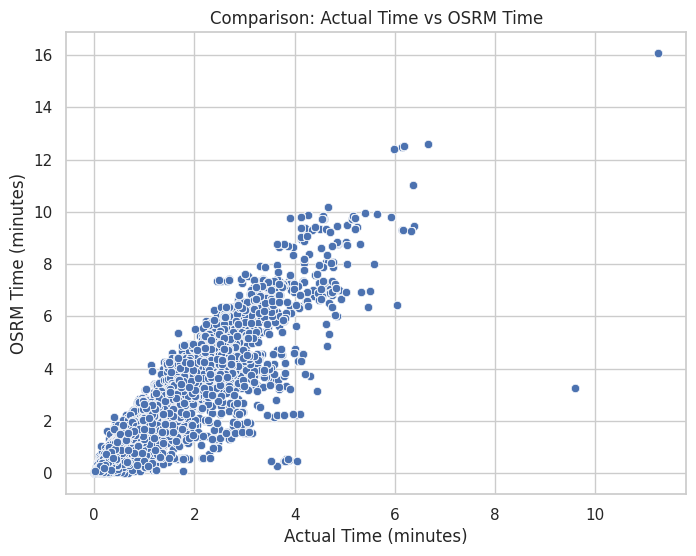

In [26]:
# 3. Compare actual_time_sum vs osrm_time_sum
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_time_sum', y='osrm_time_sum', data=delhivery_data)
plt.title('Comparison: Actual Time vs OSRM Time')
plt.xlabel('Actual Time (minutes)')
plt.ylabel('OSRM Time (minutes)')
plt.show()


4. Compare Aggregated Distance Fields

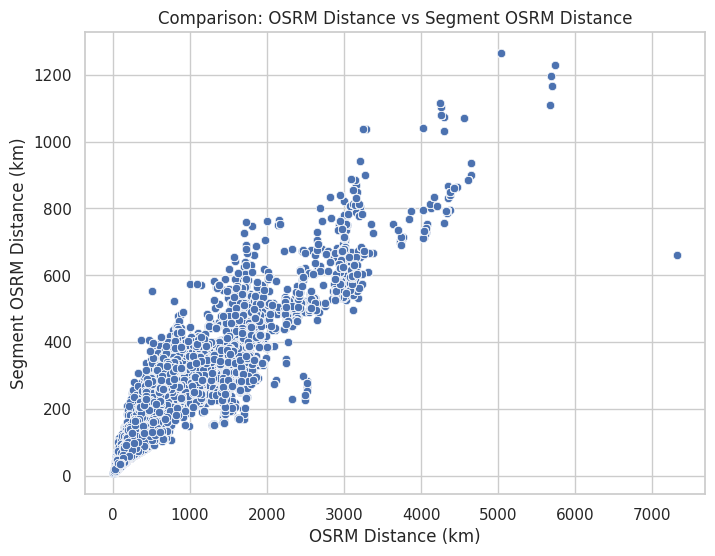

In [27]:
# 4. Compare osrm_distance_sum vs segment_osrm_distance_sum
plt.figure(figsize=(8, 6))
sns.scatterplot(x='osrm_distance_sum', y='segment_osrm_distance_sum', data=delhivery_data)
plt.title('Comparison: OSRM Distance vs Segment OSRM Distance')
plt.xlabel('OSRM Distance (km)')
plt.ylabel('Segment OSRM Distance (km)')
plt.show()


5. Bivariate Relationships: Heatmap for Correlation

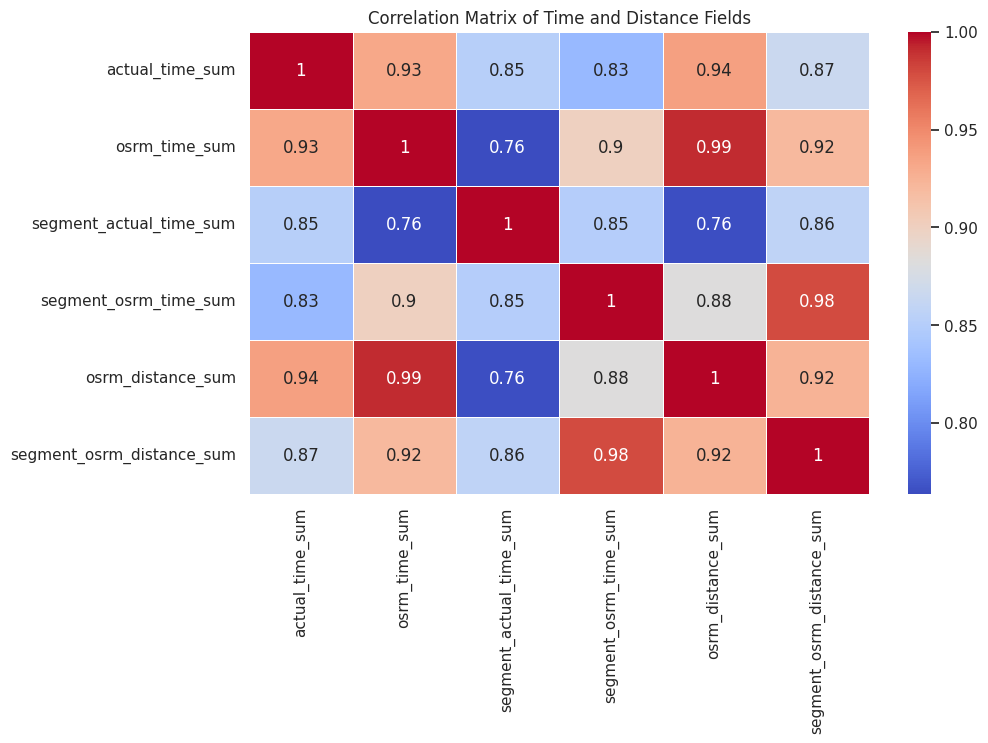

In [28]:
# 5. Correlation heatmap of time and distance fields
corr_columns = ['actual_time_sum', 'osrm_time_sum', 'segment_actual_time_sum',
                'segment_osrm_time_sum', 'osrm_distance_sum', 'segment_osrm_distance_sum']

corr_matrix = delhivery_data[corr_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Time and Distance Fields')
plt.show()


6. Time Differences

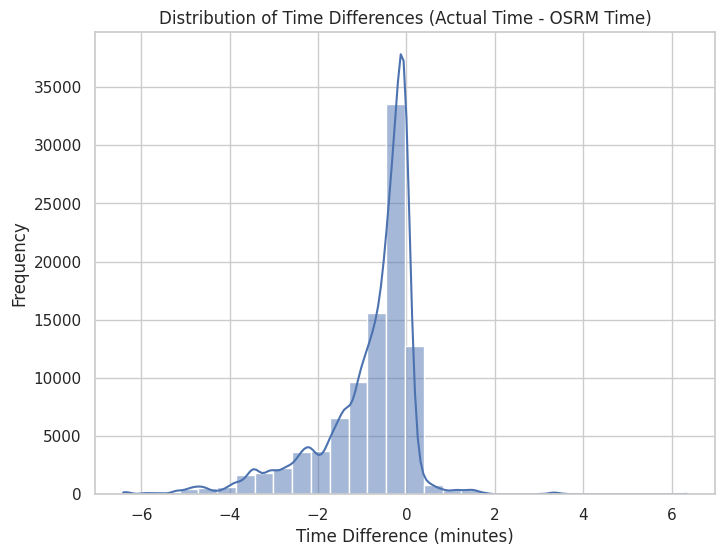

In [29]:
# 6. Plot the distribution of time differences (actual - osrm)
plt.figure(figsize=(8, 6))
sns.histplot(delhivery_data['time_diff'], kde=True, bins=30)
plt.title('Distribution of Time Differences (Actual Time - OSRM Time)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()


# Missing values Treatment & Outlier treatment

**1. Missing Values Treatment**

1.1. Identify Missing Values


In [30]:
# Check for missing values
missing_values = delhivery_data.isnull().sum()

# Show columns with missing values
print("Missing Values per Column:")
print(missing_values[missing_values > 0])


Missing Values per Column:
segment_time_ratio    1654
dtype: int64


1.2. Impute Missing Values

In [31]:
# Fill missing values in categorical columns with the mode
delhivery_data['source_name'].fillna(delhivery_data['source_name'].mode()[0], inplace=True)
delhivery_data['destination_name'].fillna(delhivery_data['destination_name'].mode()[0], inplace=True)


In [32]:
# Fill missing values in numerical columns with the median
numerical_columns = ['actual_time_sum', 'osrm_time_sum', 'osrm_distance_sum']  # Add relevant columns with missing values
for col in numerical_columns:
    delhivery_data[col].fillna(delhivery_data[col].median(), inplace=True)


**2. Outlier Treatment**

In [33]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR outlier treatment to the relevant numerical columns
columns_to_treat = ['actual_time_sum', 'osrm_time_sum', 'osrm_distance_sum']

for col in columns_to_treat:
    delhivery_data = remove_outliers(delhivery_data, col)

# Check the dataset after outlier removal
print("Dataset after Outlier Treatment:")
print(delhivery_data.describe())


Dataset after Outlier Treatment:
                  trip_creation_time                  od_start_time  \
count                          85649                          85649   
mean   2018-09-22 11:39:48.361330432  2018-09-22 15:27:47.617502976   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 01:05:27.833006080  2018-09-17 05:45:39.140850944   
50%    2018-09-22 01:34:33.498785024  2018-09-22 05:24:44.491769088   
75%    2018-09-27 17:56:30.269254912  2018-09-27 20:42:08.818902016   
max       2018-10-03 23:59:42.701692     2018-10-06 00:08:33.866586   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  cutoff_factor  \
count                          85649            85649.000000   85649.000000   
mean   2018-09-22 20:04:41.977695232                0.225117      44.552242   
min       2018-09-12 00:50:10.814399                0.000000       9.000000   
25%    2018

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [34]:
# Remove rows with negative or zero values in time-related columns
delhivery_data = delhivery_data[(delhivery_data['actual_time_sum'] > 0) & (delhivery_data['osrm_time_sum'] > 0)]


In [35]:
# Summary of missing values after treatment
print("Missing Values after Imputation:")
print(delhivery_data.isnull().sum())

# Save the cleaned dataset to a CSV file
delhivery_data.to_csv("cleaned_delhivery_data.csv", index=False)


Missing Values after Imputation:
data                          0
trip_creation_time            0
route_schedule_uuid           0
trip_uuid                     0
source_center                 0
                             ..
segment_osrm_time_max         0
segment_osrm_distance_sum     0
segment_osrm_distance_mean    0
segment_osrm_distance_max     0
time_diff                     0
Length: 111, dtype: int64


# Checking relationship between aggregated fields

**1. Calculate Correlation Between Aggregated Fields**

In [36]:
# List of relevant aggregated fields
aggregated_fields = [
    'actual_time_sum', 'osrm_time_sum', 'segment_actual_time_sum',
    'osrm_distance_sum', 'segment_osrm_distance_sum'
]

# Calculate the correlation matrix
correlation_matrix = delhivery_data[aggregated_fields].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           actual_time_sum  osrm_time_sum  \
actual_time_sum                   1.000000       0.899645   
osrm_time_sum                     0.899645       1.000000   
segment_actual_time_sum           0.806401       0.680007   
osrm_distance_sum                 0.910920       0.984507   
segment_osrm_distance_sum         0.797704       0.865424   

                           segment_actual_time_sum  osrm_distance_sum  \
actual_time_sum                           0.806401           0.910920   
osrm_time_sum                             0.680007           0.984507   
segment_actual_time_sum                   1.000000           0.683384   
osrm_distance_sum                         0.683384           1.000000   
segment_osrm_distance_sum                 0.823881           0.871402   

                           segment_osrm_distance_sum  
actual_time_sum                             0.797704  
osrm_time_sum                               0.865424  
segment_a

**2. Visualize Relationships Using Scatter Plots**

2.1. Scatter Plot Between actual_time_sum and osrm_time_sum

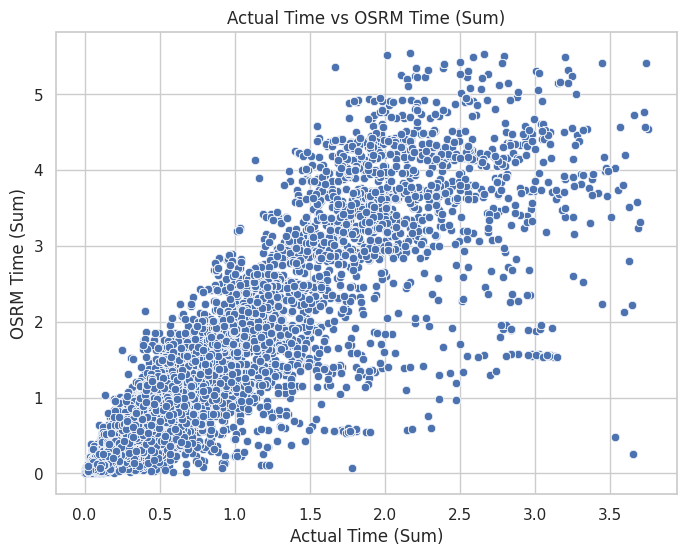

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between actual_time_sum and osrm_time_sum
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_time_sum', y='osrm_time_sum', data=delhivery_data)
plt.title('Actual Time vs OSRM Time (Sum)')
plt.xlabel('Actual Time (Sum)')
plt.ylabel('OSRM Time (Sum)')
plt.show()


2.2. Scatter Plot Between osrm_distance_sum and segment_osrm_distance_sum

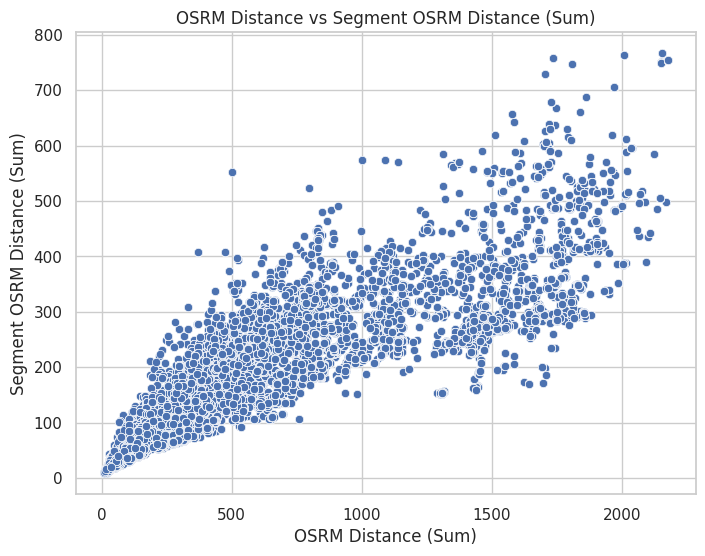

In [38]:
# Scatter plot between osrm_distance_sum and segment_osrm_distance_sum
plt.figure(figsize=(8, 6))
sns.scatterplot(x='osrm_distance_sum', y='segment_osrm_distance_sum', data=delhivery_data)
plt.title('OSRM Distance vs Segment OSRM Distance (Sum)')
plt.xlabel('OSRM Distance (Sum)')
plt.ylabel('Segment OSRM Distance (Sum)')
plt.show()


**3. Visualizing the Correlation Matrix Using a Heatmap**

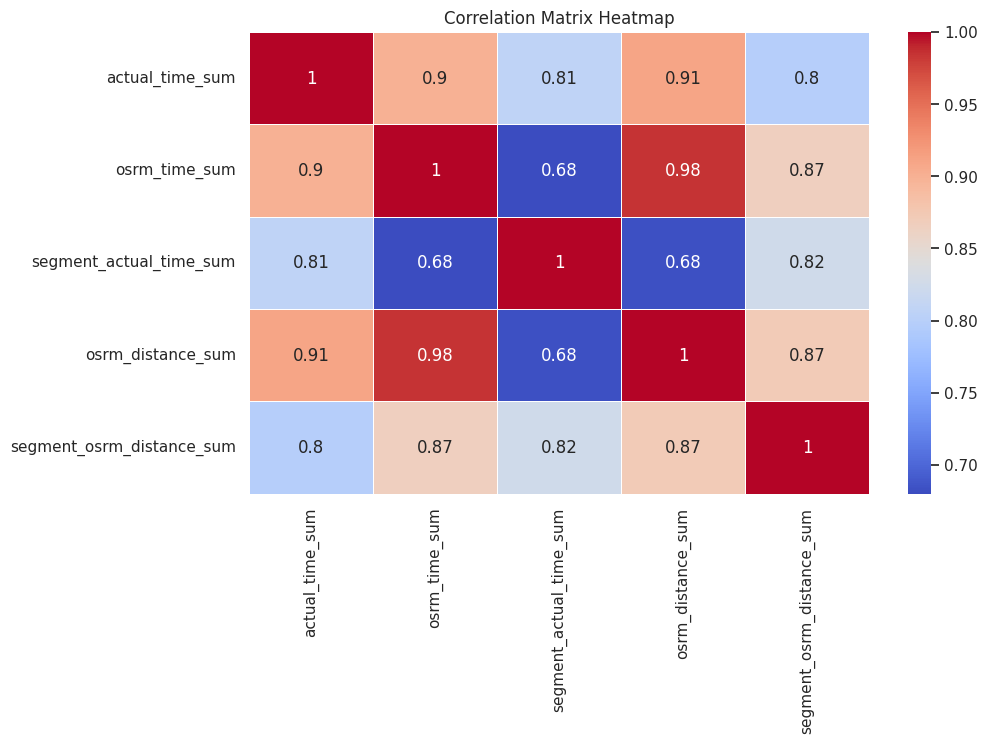

In [39]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**4. Pair Plot for Aggregated Fields**

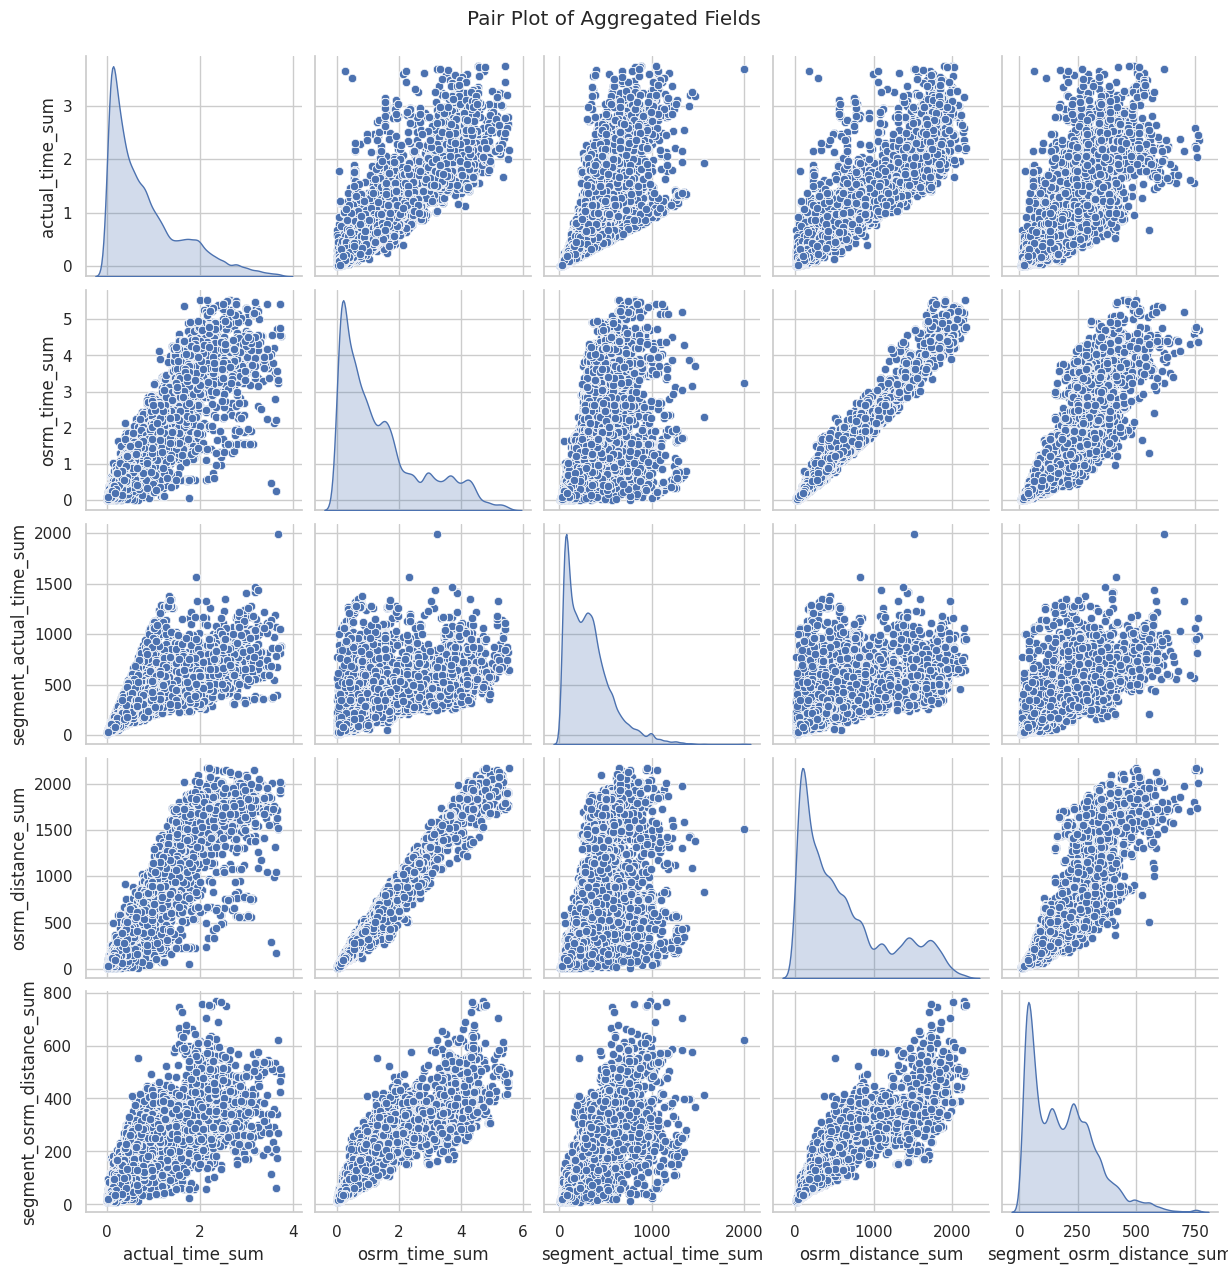

In [40]:
# Pair plot for aggregated fields
sns.pairplot(delhivery_data[aggregated_fields], diag_kind='kde')
plt.suptitle('Pair Plot of Aggregated Fields', y=1.02)
plt.show()


# Handling categorical values

In [41]:
# Identify categorical columns
categorical_columns = delhivery_data.select_dtypes(include=['object', 'category']).columns

# Show categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['data', 'route_schedule_uuid', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'cutoff_timestamp', 'source_city', 'destination_city'],
      dtype='object')


In [43]:
# Extract source_state and destination_state from source_name and destination_name
delhivery_data['source_state'] = delhivery_data['source_name'].str.extract(r'\((.*?)\)')
delhivery_data['destination_state'] = delhivery_data['destination_name'].str.extract(r'\((.*?)\)')


In [45]:
# Apply One-Hot Encoding to available categorical columns
delhivery_data_encoded = pd.get_dummies(delhivery_data, columns=['source_name', 'destination_name', 'source_state', 'destination_state'], drop_first=True)

# Check the first few rows of the encoded dataset
print(delhivery_data_encoded.head())


       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center destination_center              od_start_time  \
0  IND388121AAA       IND388620AAB 2018-09-20 03:21:32.418600   
1  IND388121AAA       IND388620AAB 2018-09-20 03:21:32.418600   
2  IND388121AAA       IND388620AAB 2018-09-20 03:21:32.418600   


In [46]:
# Check the columns after encoding
print("Columns after One-Hot Encoding:", delhivery_data_encoded.columns)


Columns after One-Hot Encoding: Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'destination_center', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff',
       ...
       'destination_state_Orissa', 'destination_state_Pondicherry',
       'destination_state_Punjab', 'destination_state_Rajasthan',
       'destination_state_Tamil Nadu', 'destination_state_Telangana',
       'destination_state_Tripura', 'destination_state_Uttar Pradesh',
       'destination_state_Uttarakhand', 'destination_state_West Bengal'],
      dtype='object', length=3111)


In [48]:
# Frequency encoding for high-cardinality categorical variables
frequency_encoding = delhivery_data['source_name'].value_counts().to_dict()
delhivery_data['source_name_freq'] = delhivery_data['source_name'].map(frequency_encoding)

# Check the frequency-encoded column
print(delhivery_data[['source_name', 'source_name_freq']].head())


                  source_name  source_name_freq
0  Anand_VUNagar_DC (Gujarat)                54
1  Anand_VUNagar_DC (Gujarat)                54
2  Anand_VUNagar_DC (Gujarat)                54
3  Anand_VUNagar_DC (Gujarat)                54
4  Anand_VUNagar_DC (Gujarat)                54


In [49]:
# Save the encoded dataset to a CSV file
delhivery_data_encoded.to_csv("delhivery_data_encoded.csv", index=False)


# Column Normalization /Column Standardization

**1. Normalization (Min-Max Scaling)**

In [50]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_columns = ['actual_time_sum', 'osrm_time_sum', 'osrm_distance_sum',
                     'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling
delhivery_data_normalized = delhivery_data.copy()  # Make a copy to avoid modifying the original dataframe
delhivery_data_normalized[numerical_columns] = scaler.fit_transform(delhivery_data_normalized[numerical_columns])

# Check the first few rows of the normalized data
print("Normalized Data (Min-Max Scaling):")
print(delhivery_data_normalized[numerical_columns].head())


Normalized Data (Min-Max Scaling):
   actual_time_sum  osrm_time_sum  osrm_distance_sum  segment_actual_time_sum  \
0         0.099549       0.128604           0.150744                 0.079053   
1         0.099549       0.128604           0.150744                 0.079053   
2         0.099549       0.128604           0.150744                 0.079053   
3         0.099549       0.128604           0.150744                 0.079053   
4         0.099549       0.128604           0.150744                 0.079053   

   segment_osrm_time_sum  segment_osrm_distance_sum  
0               0.121257                   0.123637  
1               0.121257                   0.123637  
2               0.121257                   0.123637  
3               0.121257                   0.123637  
4               0.121257                   0.123637  


**2. Standardization (Z-score Scaling)**

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standard scaling
delhivery_data_standardized = delhivery_data.copy()  # Make a copy to avoid modifying the original dataframe
delhivery_data_standardized[numerical_columns] = scaler.fit_transform(delhivery_data_standardized[numerical_columns])

# Check the first few rows of the standardized data
print("Standardized Data (Z-score Scaling):")
print(delhivery_data_standardized[numerical_columns].head())


Standardized Data (Z-score Scaling):
   actual_time_sum  osrm_time_sum  osrm_distance_sum  segment_actual_time_sum  \
0        -0.605478      -0.548625          -0.514899                -0.610371   
1        -0.605478      -0.548625          -0.514899                -0.610371   
2        -0.605478      -0.548625          -0.514899                -0.610371   
3        -0.605478      -0.548625          -0.514899                -0.610371   
4        -0.605478      -0.548625          -0.514899                -0.610371   

   segment_osrm_time_sum  segment_osrm_distance_sum  
0              -0.602571                    -0.6026  
1              -0.602571                    -0.6026  
2              -0.602571                    -0.6026  
3              -0.602571                    -0.6026  
4              -0.602571                    -0.6026  


**3. Save the Normalized and Standardized Data**

In [52]:
# Save the normalized dataset to a CSV file
delhivery_data_normalized.to_csv("delhivery_data_normalized.csv", index=False)

# Save the standardized dataset to a CSV file
delhivery_data_standardized.to_csv("delhivery_data_standardized.csv", index=False)


**4. Visualizing the Effect of Normalization and Standardization**

4.1. Visualize Normalized Data

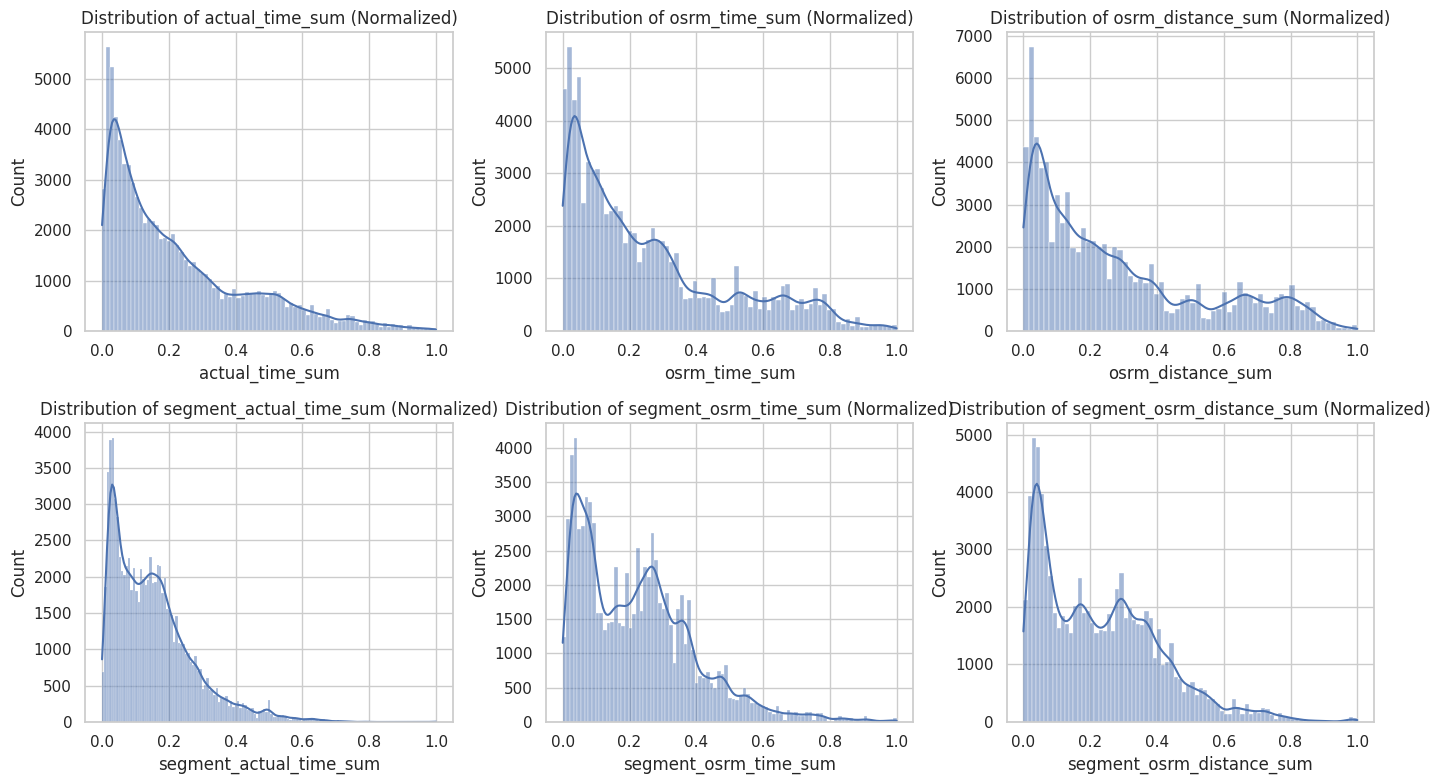

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of normalized data
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(delhivery_data_normalized[col], kde=True)
    plt.title(f'Distribution of {col} (Normalized)')

plt.tight_layout()
plt.show()


4.2. Visualize Standardized Data

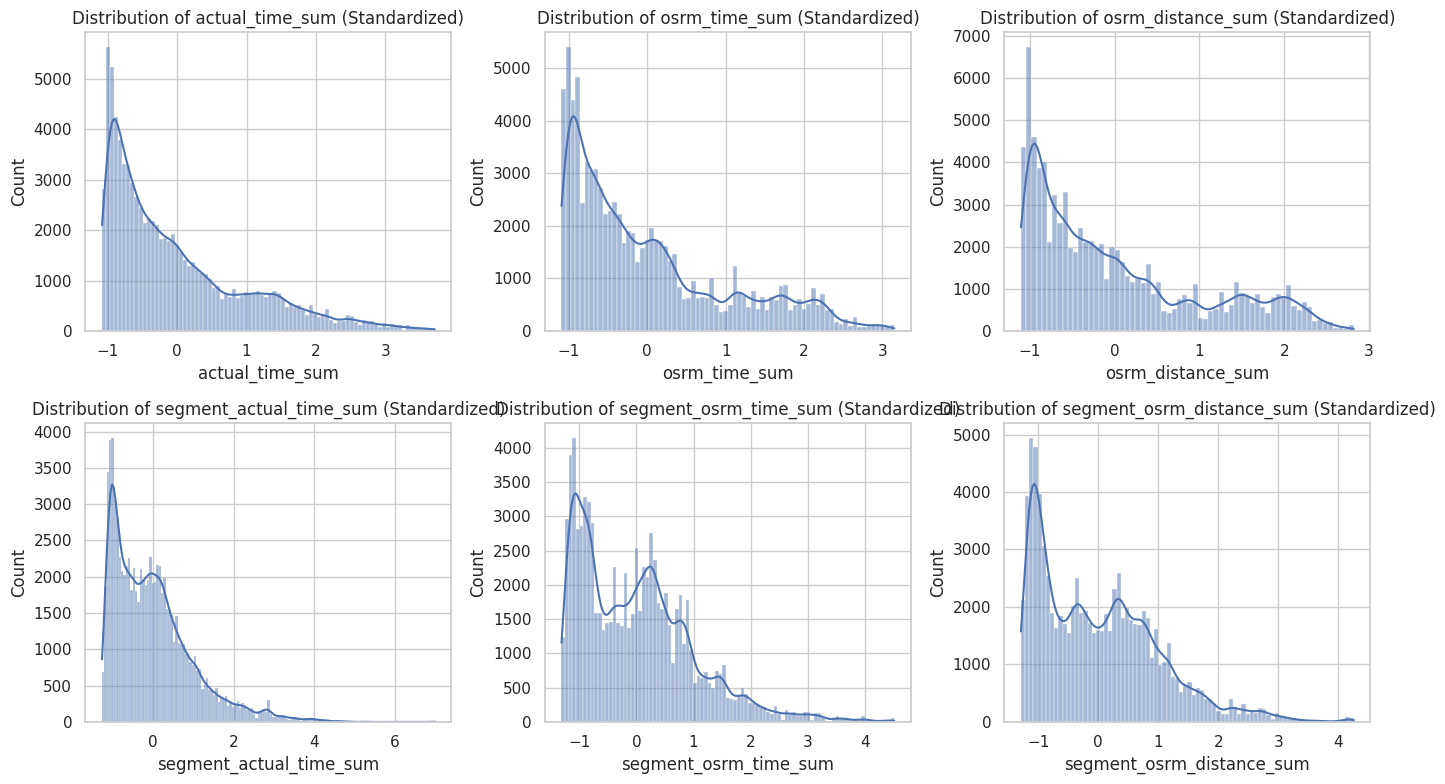

In [54]:
# Visualize the distribution of standardized data
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(delhivery_data_standardized[col], kde=True)
    plt.title(f'Distribution of {col} (Standardized)')

plt.tight_layout()
plt.show()


# Business Insights

**1. Identify Most Frequent Source and Destination States**

We will start by finding the states from which most orders are originating and the states where they are delivered.

In [55]:
# Check most frequent source states
most_frequent_source_states = delhivery_data['source_state'].value_counts().head(5)
print("Most Frequent Source States:")
print(most_frequent_source_states)

# Check most frequent destination states
most_frequent_destination_states = delhivery_data['destination_state'].value_counts().head(5)
print("Most Frequent Destination States:")
print(most_frequent_destination_states)


Most Frequent Source States:
source_state
Karnataka        11536
Maharashtra      10788
Haryana           8827
Tamil Nadu        7103
Uttar Pradesh     5130
Name: count, dtype: int64
Most Frequent Destination States:
destination_state
Karnataka        11858
Maharashtra      10677
Haryana           8676
Tamil Nadu        6848
Uttar Pradesh     5322
Name: count, dtype: int64


**2. Identify the Busiest Corridor**

A corridor is defined as a route between a source and destination. We will identify the busiest corridors by counting the most frequent source-destination pairs.

In [56]:
# Create a corridor (source to destination) column
delhivery_data['corridor'] = delhivery_data['source_name'] + " to " + delhivery_data['destination_name']

# Find the busiest corridors
busiest_corridors = delhivery_data['corridor'].value_counts().head(5)
print("Busiest Corridors:")
print(busiest_corridors)


Busiest Corridors:
corridor
Sonipat_Kundli_H (Haryana) to Gurgaon_Bilaspur_HB (Haryana)               760
Gurgaon_Bilaspur_HB (Haryana) to Sonipat_Kundli_H (Haryana)               741
Chandigarh_Mehmdpur_H (Punjab) to Gurgaon_Bilaspur_HB (Haryana)           705
Gurgaon_Bilaspur_HB (Haryana) to Chandigarh_Mehmdpur_H (Punjab)           616
Bengaluru_Bomsndra_HB (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)    605
Name: count, dtype: int64


**3. Calculate Average Distance and Average Time for Deliveries**

We will calculate the average distance and time for deliveries between the source and destination pairs, which will help us analyze how long deliveries typically take across different corridors.

3.1. Average Distance Between Key Corridors

In [57]:
# Calculate the average distance for the top corridors
avg_distance_by_corridor = delhivery_data.groupby('corridor')['osrm_distance_sum'].mean().sort_values(ascending=False).head(5)
print("Average Distance for Top Corridors (in km):")
print(avg_distance_by_corridor)


Average Distance for Top Corridors (in km):
corridor
Gwalior_HrihrNgr_I (Madhya Pradesh) to Datia_TownDPP_D (Madhya Pradesh)    2124.335300
Bangalore_Nelmngla_H (Karnataka) to Davangere_Central_I_1 (Karnataka)      2092.519500
Moradabad_DC (Uttar Pradesh) to Rudrapur_UdhamNgr_H (Uttarakhand)          2056.262300
Choutuppal_Nagaram_D (Telangana) to Miryalguda_Ragvendr_D (Telangana)      2038.038433
Bokakhat_MlnprDPP_D (Assam) to Golaghat_BaruaRd_D (Assam)                  2020.807300
Name: osrm_distance_sum, dtype: float64


3.2. Average Time Between Key Corridors

In [58]:
# Calculate the average actual time for deliveries across the top corridors
avg_time_by_corridor = delhivery_data.groupby('corridor')['actual_time_sum'].mean().sort_values(ascending=False).head(5)
print("Average Time Taken for Top Corridors (in minutes):")
print(avg_time_by_corridor)


Average Time Taken for Top Corridors (in minutes):
corridor
Sagara_Vardhard_D (Karnataka) to Bangalore_Nelmngla_H (Karnataka)              3.725490
Sidhi_Padra_D (Madhya Pradesh) to Allahabad_Central_H_1 (Uttar Pradesh)        3.682709
Kolkata_Dankuni_HB (West Bengal) to Berhampore_Central_I_2 (West Bengal)       3.658200
Phulpur_Shekhpur_D (Uttar Pradesh) to Allahabad_Central_H_1 (Uttar Pradesh)    3.589572
Surat_HUB (Gujarat) to Pune_Tathawde_H (Maharashtra)                           3.419786
Name: actual_time_sum, dtype: float64


**4. Compare Actual and OSRM-Predicted Time**

We can analyze how the actual delivery times compare to the OSRM-predicted times. This insight will help us identify routes or corridors where deliveries are faster or slower than expected.

In [59]:
# Calculate the time difference between actual and OSRM-predicted times
delhivery_data['time_diff'] = delhivery_data['actual_time_sum'] - delhivery_data['osrm_time_sum']

# Check the corridors with the highest and lowest time differences
largest_time_differences = delhivery_data.groupby('corridor')['time_diff'].mean().sort_values(ascending=False).head(5)
print("Corridors with Largest Time Differences (Actual Time - OSRM Time):")
print(largest_time_differences)

# Corridors where deliveries are faster than expected (negative time difference)
fastest_corridors = delhivery_data.groupby('corridor')['time_diff'].mean().sort_values(ascending=True).head(5)
print("Corridors where Deliveries are Faster than Expected (Negative Time Difference):")
print(fastest_corridors)


Corridors with Largest Time Differences (Actual Time - OSRM Time):
corridor
Phulpur_Shekhpur_D (Uttar Pradesh) to Allahabad_Central_H_1 (Uttar Pradesh)    3.222160
Jaynagar_Wardno6_D (Bihar) to Muzaffrpur_Bbganj_I (Bihar)                      1.398467
Madhubani_Bardivan_D (Bihar) to Jaynagar_Wardno6_D (Bihar)                     1.314350
Muzaffrpur_Bbganj_I (Bihar) to Madhubani_Bardivan_D (Bihar)                    1.251774
Peterbar_GagiDPP_D (Jharkhand) to Ranchi_Hub (Jharkhand)                       1.145287
Name: time_diff, dtype: float64
Corridors where Deliveries are Faster than Expected (Negative Time Difference):
corridor
Jaisalmer_Gopa3PL_D (Rajasthan) to Pokhran_SttinDPP_D (Rajasthan)   -3.102367
Barmer_Nehru3PL_D (Rajasthan) to Jaisalmer_Gopa3PL_D (Rajasthan)    -3.024463
Jaisalmer_Gopa3PL_D (Rajasthan) to Phalodi_PalikDPP_D (Rajasthan)   -3.001387
Ahmedabad_East_H_1 (Gujarat) to Gandhidham_Sector1A_IP (Gujarat)    -2.833945
Pallakad_ChndrNgr_D (Kerala) to Bangalore_Nelmngla_

**Overall Insights:**

Karnataka, Maharashtra, and Haryana are the most significant states in terms of both originating and receiving orders, indicating these regions should be a key focus for optimizing logistics operations.

Haryana has the busiest corridors, especially between Sonipat and Gurgaon, which highlights the importance of managing logistical flow within the state.

There is a significant discrepancy between actual and predicted delivery times on certain corridors, with some corridors taking longer than expected and others being faster. These findings can be used to prioritize route optimization and mitigate delays.

Long-distance corridors present challenges, especially when spanning multiple states. Focus should be placed on improving efficiency for these corridors through better planning and resource allocation.

# Recommendations

**1. Focus on Optimizing Karnataka and Maharashtra**

**Why:** Karnataka and Maharashtra are the top states for both sending and receiving orders.

**Action:** Invest in additional resources such as more vehicles, warehouse space, and staff in these states to handle the high volume of deliveries more efficiently.

**2. Improve Operations in Haryana’s Busiest Corridors**

**Why:** The busiest delivery routes are between Sonipat and Gurgaon in Haryana, handling hundreds of trips daily.

**Action:** Streamline these corridors by setting up dedicated lanes, increasing delivery slots, and automating processes for faster handoffs. Consider implementing more precise traffic management to avoid congestion.

**3. Address Delays on Specific Corridors**

**Why:** Certain corridors, like Phulpur to Allahabad and Jaynagar to Muzaffrpur, are taking much longer than predicted, suggesting logistical issues or delays.

**Action:** Investigate the causes of delays on these corridors. It could be due to poor road conditions, congestion, or bottlenecks at certain points. After identifying the problem areas, work on solutions like rerouting, improving road access, or adjusting delivery schedules to avoid peak hours.

**4. Expand Delivery Capacity in Haryana and Punjab**

**Why:** Routes between Haryana and Punjab are among the busiest in terms of delivery volume.

**Action:** Consider establishing new delivery centers or expanding existing facilities along these routes to increase capacity and reduce the burden on current resources.

**5. Learn from Fast Corridors**

**Why:** Some corridors, such as Jaisalmer to Pokhran and Ahmedabad to Gandhidham, have consistently faster-than-expected deliveries.

**Action:** Study these routes to identify best practices and replicate them across slower-performing routes. For instance, assess the route planning, traffic patterns, and vehicle usage on these routes to see what can be applied elsewhere.

**6. Invest in Long-Distance Route Optimization**

**Why:** Routes like Gwalior to Datia and Bangalore to Davangere cover long distances and involve complex logistics.

**Action:** Introduce automated route optimization tools to better plan fuel stops, driver shifts, and vehicle usage to maximize efficiency over these long distances. Consider using hub-and-spoke models to reduce travel time.

**7. Allocate Additional Resources to Underperforming States**

**Why:** Certain states, such as Bihar and Uttar Pradesh, show higher-than-expected delivery times.

**Action:** Allocate additional resources like vehicles, staff, or technology upgrades in these underperforming states to bring delivery times in line with predictions. Regularly review performance in these states and adjust resources accordingly.

**8. Increase Capacity for Short-Distance High-Volume Routes**

**Why:** Shorter routes within the same state, such as Bengaluru to Bengaluru in Karnataka, have a high volume of trips.

**Action:** Increase the number of delivery slots and use smaller, faster vehicles for these short-distance, high-volume routes. This will ensure faster and more frequent deliveries within cities.

**9. Monitor and Adjust Based on Traffic Patterns**

**Why:** Some routes take longer than expected due to unpredictable traffic conditions.

**Action:** Implement real-time traffic monitoring and dynamic route adjustments to avoid congested roads. Adjust delivery times or routes based on traffic forecasts to minimize delays.

**10. Encourage Collaboration with Local Authorities**

**Why:** Delays on specific routes can be caused by road conditions or infrastructure issues.

**Action:** Work with local authorities to improve road conditions on key delivery routes, particularly in areas where deliveries take longer than expected. Collaborating with local governments to improve road access can significantly reduce delays.